<a href="https://colab.research.google.com/github/vew271/packeco/blob/master/Capstone_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [ ]:
import os
import zipfile
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


# Acquiring Data

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download kmader/food41

100% 5.30G/5.30G [01:52<00:00, 34.2MB/s]
100% 5.30G/5.30G [01:52<00:00, 50.6MB/s]


In [ ]:
!chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


# Generate Dataset

In [ ]:
# make new directory for necessary dataset

os.mkdir('/content/dataset')
os.mkdir('/tmp/makanan-basah-vs-makanan-kering')
os.mkdir('/tmp/makanan-basah-vs-makanan-kering/basah')
os.mkdir('/tmp/makanan-basah-vs-makanan-kering/kering')

In [ ]:
#unzip dataset
local_zip = '/content/food41.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [ ]:
print(len(os.listdir('/content/dataset/images/chicken_curry')))
print(len(os.listdir('/content/dataset/images/hot_and_sour_soup/')))
print(len(os.listdir('/content/dataset/images/ramen/')))
print(len(os.listdir('/content/dataset/images/donuts/')))
print(len(os.listdir('/content/dataset/images/fried_rice/')))
print(len(os.listdir('/content/dataset/images/hamburger/')))

1000
1000
1000
1000
1000
1000


In [ ]:
# move necessary data to makanan basah directory
source_b1 = r'/content/dataset/images/chicken_curry'
source_b2 = r'/content/dataset/images/hot_and_sour_soup'
source_b3  = r'/content/dataset/images/ramen'
destination_b = r'/tmp/makanan-basah-vs-makanan-kering/basah'

def path(SOURCE, DESTINATION):
  files = os.listdir(SOURCE)
  for file in files:
    new_path = shutil.move(f"{SOURCE}/{file}", DESTINATION)
    print(new_path)

path(source_b1, destination_b)
path(source_b2, destination_b)
path(source_b3, destination_b)

/tmp/makanan-basah-vs-makanan-kering/basah/476423.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/220003.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/2589984.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/3071510.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1802047.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/514844.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/2973786.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1387405.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1700927.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/3428108.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1400766.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/3596218.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1213873.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/340050.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/39376.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1591707.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/1428217.jpg
/tmp/makanan-basah-vs-makanan-kering/basah/3679216.jpg
/tmp/makanan-bas

In [ ]:
# move necessary files to makanan kering directory
source_k1 = r'/content/dataset/images/donuts'
source_k2 = r'/content/dataset/images/fried_rice'
source_k3  = r'/content/dataset/images/hamburger'
destination_k = r'/tmp/makanan-basah-vs-makanan-kering/kering'

def path(SOURCE, DESTINATION):
  files = os.listdir(SOURCE)
  for file in files:
    new_path = shutil.move(f"{SOURCE}/{file}", DESTINATION)
    print(new_path)

path(source_k1, destination_k)
path(source_k2, destination_k)
path(source_k3, destination_k)

/tmp/makanan-basah-vs-makanan-kering/kering/1290278.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1579093.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/719689.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/2715832.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/554757.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1300776.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1608411.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/2975172.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1539242.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1864108.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/2512789.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/2443948.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/48537.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/3781421.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/3097160.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/1244316.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/3828533.jpg
/tmp/makanan-basah-vs-makanan-kering/kering/2179784.

In [ ]:
#delete dataset directory which isn't necessary
shutil.rmtree('/content/dataset')

# Data Preprocessing

In [ ]:
dataset_folder = '/tmp/makanan-basah-vs-makanan-kering'
image_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=1002,
    validation_split=0.2,
    subset="training")

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=1002,
    image_size=image_size,
    validation_split=0.2,
    subset="validation")

Found 6000 files belonging to 2 classes.
Using 4800 files for training.
Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


# Visualize Dataset

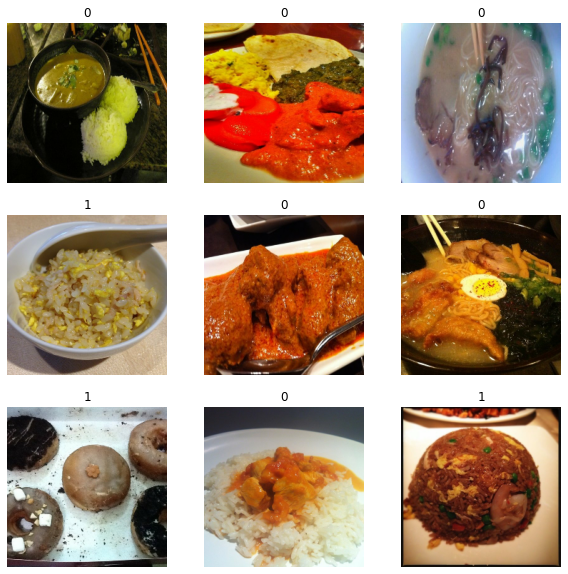

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.Rescaling(scale=1./255),
     layers.experimental.preprocessing.Normalization(),
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.4),
     layers.experimental.preprocessing.RandomZoom(height_factor=(0.1, 0.3), width_factor=(0.1, 0.3)),
     layers.experimental.preprocessing.RandomHeight(factor=(0.1, 0.2)),
     layers.experimental.preprocessing.RandomWidth(factor=(0.1, 0.2))
    ]
)

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))


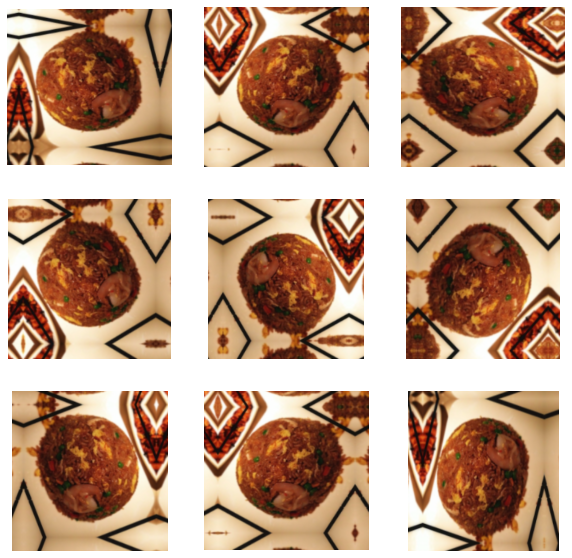

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy())
        plt.axis("off")

# Configure Dataset for Performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build and Training The Model

## Transfer Learning

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), input_tensor=None, weights='imagenet', include_top=False)

base_model.trainable = False #freeze base model

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     7         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,272
Trainable params: 1,281
Non-trainable params: 2,257,991
_______________________________________________

In [ ]:
model.compile(optimizer = 'Adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epoch = 15

history = model.fit(train_ds,
                    epochs=initial_epoch,
                    validation_data=val_ds)

Epoch 1/15
150/150 [==============================] - 71s 253ms/step - loss: 0.4068 - accuracy: 0.7973 - val_loss: 0.2265 - val_accuracy: 0.9258
Epoch 2/15
150/150 [==============================] - 16s 109ms/step - loss: 0.3018 - accuracy: 0.8612 - val_loss: 0.1876 - val_accuracy: 0.9317
Epoch 3/15
150/150 [==============================] - 13s 86ms/step - loss: 0.2736 - accuracy: 0.8779 - val_loss: 0.1737 - val_accuracy: 0.9350
Epoch 4/15
150/150 [==============================] - 11s 76ms/step - loss: 0.2619 - accuracy: 0.8833 - val_loss: 0.1630 - val_accuracy: 0.9392
Epoch 5/15
150/150 [==============================] - 11s 74ms/step - loss: 0.2539 - accuracy: 0.8863 - val_loss: 0.1647 - val_accuracy: 0.9433
Epoch 6/15
150/150 [==============================] - 10s 70ms/step - loss: 0.2432 - accuracy: 0.8958 - val_loss: 0.1617 - val_accuracy: 0.9433
Epoch 7/15
150/150 [==============================] - 10s 69ms/step - loss: 0.2407 - accuracy: 0.8958 - val_loss: 0.1587 - val_accurac

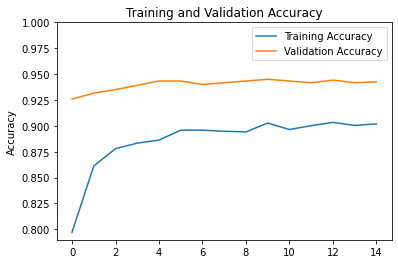

In [ ]:
# plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

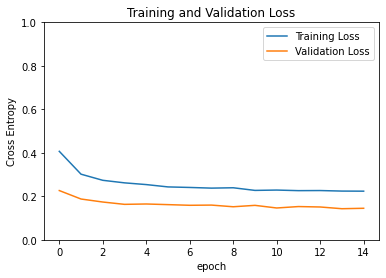

In [ ]:
# plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

In [ ]:
base_model.trainable = True
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     7         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,272
Trainable params: 2,225,153
Non-trainable params: 34,119
______________________________________________

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(1e-5),
              loss = keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epoch + fine_tune_epochs

history_fine_tuning = model.fit(train_ds,
                                epochs=total_epochs,
                                initial_epoch=history.epoch[-1],
                                validation_data=val_ds)

Epoch 15/25
150/150 [==============================] - 86s 530ms/step - loss: 0.2145 - accuracy: 0.9044 - val_loss: 0.1316 - val_accuracy: 0.9500
Epoch 16/25
150/150 [==============================] - 57s 383ms/step - loss: 0.1815 - accuracy: 0.9244 - val_loss: 0.1204 - val_accuracy: 0.9500
Epoch 17/25
150/150 [==============================] - 52s 344ms/step - loss: 0.1532 - accuracy: 0.9325 - val_loss: 0.1174 - val_accuracy: 0.9533
Epoch 18/25
150/150 [==============================] - 49s 329ms/step - loss: 0.1460 - accuracy: 0.9423 - val_loss: 0.1277 - val_accuracy: 0.9533
Epoch 19/25
150/150 [==============================] - 48s 319ms/step - loss: 0.1342 - accuracy: 0.9421 - val_loss: 0.1128 - val_accuracy: 0.9567
Epoch 20/25
150/150 [==============================] - 46s 308ms/step - loss: 0.1230 - accuracy: 0.9502 - val_loss: 0.1016 - val_accuracy: 0.9583
Epoch 21/25
150/150 [==============================] - 46s 304ms/step - loss: 0.1155 - accuracy: 0.9508 - val_loss: 0.1041 -

## Model Evaluation

In [ ]:
# plot accuracy

acc += history_fine_tuning.history['accuracy']
val_acc += history_fine_tuning.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epoch-1,initial_epoch-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

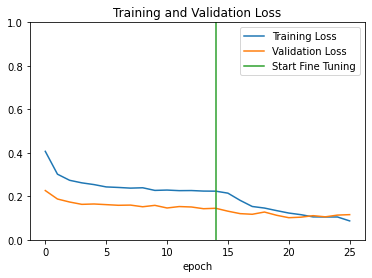

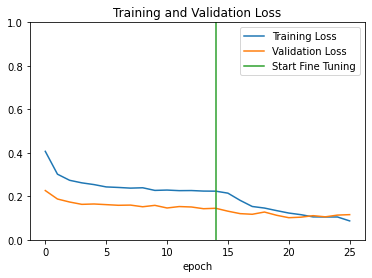

In [ ]:
# plot loss

loss += history_fine_tuning.history['loss']
val_loss += history_fine_tuning.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epoch-1,initial_epoch-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Predicting Image

Saving ayam goreng.jpg to ayam goreng.jpg
Makanan Kering


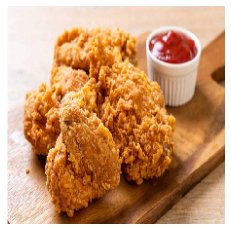

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.axis('off')

  predictions = model.predict(x)
  score = predictions[0]

  # convert score to the absolute value
  b = abs(1-score)
  k = abs(score)

  # predict result
  if b > k:
    print("Makanan Basah")
  else:
    print("Makanan Kering")

# Save The Model

In [ ]:
model.save('packeco.h5') #in .h5 file

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## TF Lite

In [ ]:
# Export The Model
export_dir = '/content/capstone'
tf.saved_model.save(model, export_dir) #in .pb file

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/capstone/assets


In [ ]:
!saved_model_cli show --dir capstone --tag_set serve

The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"


In [ ]:
%%bash -s $export_dir
saved_model_cli show --dir capstone --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_input_2:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
loaded = tf.saved_model.load(export_dir)

In [ ]:
# Convert the model using TFLite Converter

converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
# post training quantization
#converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
# convert model
tflite_model = converter.convert()
tflite_model_file = 'packeco.tflite'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpqy40yth0/assets


INFO:tensorflow:Assets written to: /tmp/tmpqy40yth0/assets


In [ ]:
# Save the model.
with open(tflite_model_file, 'wb') as f:
  f.write(tflite_model)

In [ ]:
# archive the .pb model
import shutil
shutil.make_archive('/content/capstone', 'zip', 'capstone')

'/content/capstone.zip'